<div style="text-align: center;"><b><h1>Prezentacja</h1></b></div>

<div style="text-align: center; font-size: larger;"><h3>Nazwa grupy: Prograde</h3></div>
<div style="text-align: center; font-size: larger;"><h3>Tytuł: Pokemon</h3></div>

<div style="text-align: right;">
    <div>Grażyna Juńska</div>
    <div>Mikołaj Piątkowski</div>
    <div>Piotr Neumann</div>
</div>

<div style="text-align: center;"><b><h1>Plan prezentacji</h1></b></div>

<div style="text-align: left;">
    <div><b><br>* Implementacja bibliotek</b></div>
    <div><b>* Źródło danych</b></div>
    <div><b>* Omówienie prędkości pokemonów na podstawie rozkłądu normalnego, wykresów pudełkowego oraz słupkowego</b></div>
    <div><b>* Omówienie ataku pokemonów na podstawie rozkłądu normalnego, wykresów pudełkowego oraz słupkowego</b></div>
    <div><b>* Omówienie obrony pokemonów na podstawie rozkłądu normalnego, wykresów pudełkowego oraz słupkowego</b></div>
    <div><b>* Reprezentacja progresji liniowej na podstawie wagi oraz ataku pokemonów</b></div>
    <div><b>* Przedstawienie zasad stworzonej gry</b></div>
    <div><b>* Zwizualizoiwanie jaki pokemon ma najwięcje zwycięstw oraz jaki ma najwięcje porażek</b></div>
    <div><b>* Które rodzaje pokemonów odnoszą najwięcej zwycięstw, a które najmniej</b></div>
    <div><b>* Przedstawienie najlepszej 6 pokemonów</b></div>
</div>

In [112]:
# import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import r2_score

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
#df = pd.read_csv(r'C:\Users\neumannp\OneDrive - Jabil\Desktop\Bootcamp\Grupa Prograte\jdszr13-prograde\python-project\data\pokemon.csv')
df = pd.read_csv('data/pokemon.csv')

In [6]:
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25             1.0          2.0   
1             2.0            1.0           0.25             1.0          2.0   
2             2.0            1.0           0.25             1.0          2.0   
3             1.0            1.0           0.50             2.0          0.5   
4             1.0            1.0           0.50             2.0          0.5   

   against_normal  against_poison  against_psychic  against_rock  \
0             1.0             1.0              2.0           1.0   
1             1.0             1.0              2.0           1.0   
2             1.0             1.0              2.0           1.0   
3             1.0             1.0              1.0           2.0   
4             1.0             1.0              1.0           2.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
0            1.0            0.5      49            5120              70   
1            1.0            0.5      62            5120              70   
2            1.0            0.5     100            5120              70   
3            0.5            2.0      52            5120              70   
4            0.5            2.0      64            5120              70   

   base_total capture_rate   classfication  defense  experience_growth  \
0         318           45    Seed Pokémon       49            1059860   
1         405           45    Seed Pokémon       63            1059860   
2         625           45    Seed Pokémon      123            1059860   
3         309           45  Lizard Pokémon       43            1059860   
4         405           45   Flame Pokémon       58            1059860   

   height_m  hp     japanese_name        name  percentage_male  \
0       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1   
1       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1   
2       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1   
3       0.6  39      Hitokageヒトカゲ  Charmander             88.1   
4       1.1  58       Lizardoリザード  Charmeleon             88.1   

   pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  \
0               1         65          65     45  grass  poison        6.9   
1               2         80          80     60  grass  poison       13.0   
2               3        122         120     80  grass  poison      100.0   
3               4         60          50     65   fire     NaN        8.5   
4               5         80          65     80   fire     NaN       19.0   

   generation  is_legendary  
0           1             0  
1           1             0  
2           1             0  
3           1             0  
4           1             0

<div style="text-align: center;"><b><h1>Obrona</h1></b></div>

In [7]:
dane = df["speed"].to_numpy()

<div style="text-align: center;"><b><h1>Przedziały ufności średniej dla</h1></b></div>
<div style="text-align: center;"><b><h1>$$1 - \alpha  = 0.95 $$</h1></b></div>

$$ 
CI_{\mu} = \bar{x} - \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2}; \bar{x} + \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2})
$$

In [8]:
rozkladNormalny = st.norm(0,1)
a = 1 - 0.95
ua = rozkladNormalny.ppf(1-a/2)
ua

1.959963984540054

In [9]:
m = st.tmean(dane)
sd = st.tstd(dane)

In [10]:
CIm = [m - sd/math.sqrt(len(dane))*ua, m + sd/math.sqrt(len(dane))*ua]

In [11]:
print("Przedział ufności pokrywający średnią wartości w populacji generalnej z p={}:".format(1-a))
print(CIm)

Przedział ufności pokrywający średnią wartości w populacji generalnej z p=0.95:
[64.33267061919032, 68.33649292637772]


<div style="text-align: center;"><b><h1>Rozkład normalny, prędkość pokemonów.</h1></b></div> 

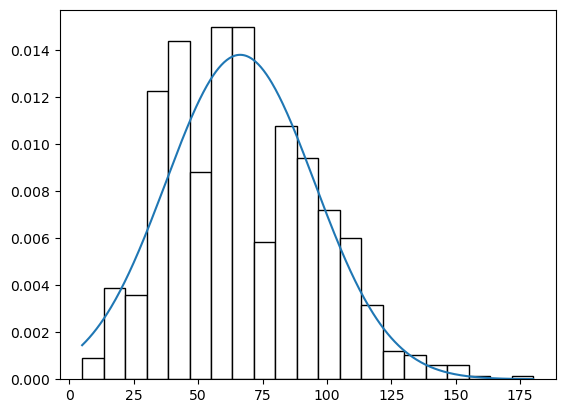

In [12]:
p = st.norm.fit(dane)
rozklad = st.norm(*p)

x = np.linspace(min(dane),max(dane),500)
plt.plot(x,rozklad.pdf(x))
plt.hist(dane,bins="auto",density=True,edgecolor="black",color="white")
pass

<div style="text-align: center;"><b><h1>Wykres pudełkowy</h1></b></div>

In [13]:
pokemon_hp = df.groupby('name')['speed'].sum().reset_index().sort_values('speed',ascending=False)
boxspeed = px.box(pokemon_hp, y='speed')
# boxhp = update_layout(title='Range of Pokemon with their HP')
boxspeed.show()

<div style="text-align: center;"><b><h1>Wykres słupkowy</h1></b></div>

In [14]:
barspeed = px.bar(pokemon_hp[:9], y='speed', x='name', color='speed', height=600)
barspeed.show()

<div style="text-align: center;"><b><h1>Atak</h1></b></div>

In [15]:
dane = df["attack"].to_numpy()

<div style="text-align: center;"><b><h1>Przedziały ufności średniej dla</h1></b></div>
<div style="text-align: center;"><b><h1>$$1 - \alpha  = 0.95 $$</h1></b></div>

$$ 
CI_{\mu} = \bar{x} - \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2}; \bar{x} + \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2})
$$

In [16]:
rozkladNormalny = st.norm(0,1)
a = 1 - 0.95
ua = rozkladNormalny.ppf(1-a/2)
ua

1.959963984540054

In [17]:
m = st.tmean(dane)
sd = st.tstd(dane)

In [18]:
CIm = [m - sd/math.sqrt(len(dane))*ua, m + sd/math.sqrt(len(dane))*ua]

In [19]:
print("Przedział ufności pokrywający średnią wartości w populacji generalnej z p={}:".format(1-a))
print(CIm)

Przedział ufności pokrywający średnią wartości w populacji generalnej z p=0.95:
[75.63061778277347, 80.08473802246996]


<div style="text-align: center;"><b><h1>Rozkład normalny Attack pokemonów.</h1></b></div>

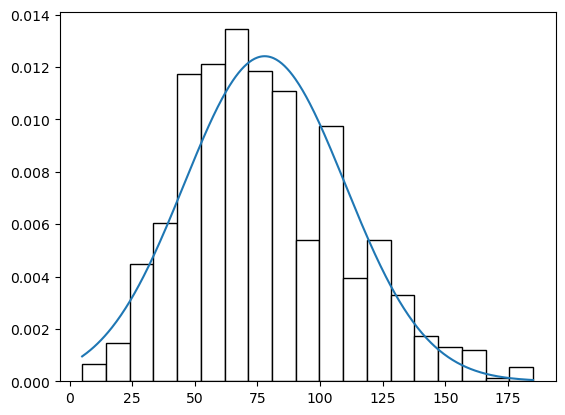

In [20]:
p = st.norm.fit(dane)
rozklad = st.norm(*p)

x = np.linspace(min(dane),max(dane),500)
plt.plot(x,rozklad.pdf(x))
plt.hist(dane,bins="auto",density=True,edgecolor="black",color="white")
pass

<div style="text-align: center;"><b><h1>Wykres pudełkowy</h1></b></div>

In [21]:
pokemon_hp = df.groupby('name')['attack'].sum().reset_index().sort_values('attack',ascending=False)
boxattack = px.box(pokemon_hp, y='attack')
# boxhp = update_layout(title='Range of Pokemon with their HP')
boxattack.show()

<div style="text-align: center;"><b><h1>Wykres słupkowy</h1></b></div>

In [22]:
barattack = px.bar(pokemon_hp[:5], y='attack', x='name', color='attack', height=600)
barattack.show()

<div style="text-align: center;"><b><h1>Obrona</h1></b></div>

In [23]:
dane = df["defense"].to_numpy()

<div style="text-align: center;"><b><h1>Przedziały ufności średniej dla</h1></b></div>
<div style="text-align: center;"><b><h1>$$1 - \alpha  = 0.95 $$</h1></b></div>

$$ 
CI_{\mu} = \bar{x} - \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2}; \bar{x} + \frac{s}{\sqrt{n}} u_1 - \frac{\alpha}{2})
$$

In [24]:
rozkladNormalny = st.norm(0,1)
a = 1 - 0.95
ua = rozkladNormalny.ppf(1-a/2)
ua

1.959963984540054

In [25]:
m = st.tmean(dane)
sd = st.tstd(dane)

In [26]:
CIm = [m - sd/math.sqrt(len(dane))*ua, m + sd/math.sqrt(len(dane))*ua]

In [27]:
print("Przedział ufności pokrywający średnią wartości w populacji generalnej z p={}:".format(1-a))
print(CIm)

Przedział ufności pokrywający średnią wartości w populacji generalnej z p=0.95:
[70.87791563689076, 75.13956251541886]


<div style="text-align: center;"><b><h1>Rozkład normalny Obrony pokemonów.</h1></b></div>

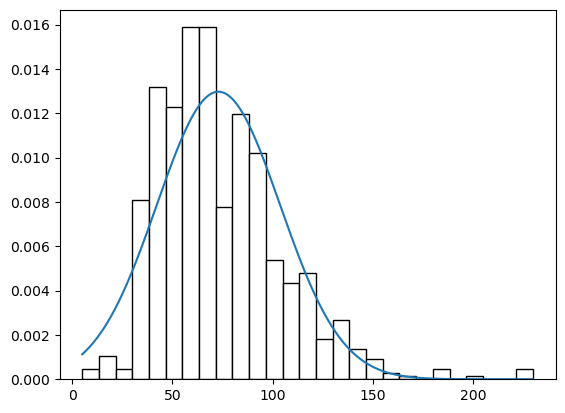

In [28]:
p = st.norm.fit(dane)
rozklad = st.norm(*p)

x = np.linspace(min(dane),max(dane),500)
plt.plot(x,rozklad.pdf(x))
plt.hist(dane,bins="auto",density=True,edgecolor="black",color="white")
pass

<div style="text-align: center;"><b><h1>Wykres pudełkowy</h1></b></div>

In [29]:
pokemon_hp = df.groupby('name')['defense'].sum().reset_index().sort_values('defense',ascending=False)
boxdefence = px.box(pokemon_hp, y='defense')
# boxhp = update_layout(title='Range of Pokemon with their HP')
boxdefence.show()

<div style="text-align: center;"><b><h1>Wykres słupkowy</h1></b></div>

In [30]:
bardefense = px.bar(pokemon_hp[:11], y='defense', x='name', color='defense', height=600)
bardefense.show()

<div style="text-align: center;"><b><h1>Regresja liniowa waga/atak</h1></b></div>

In [74]:
#Wczytywanie danych
df = pd.read_csv('data/pokemon.csv')
df = df.drop(['type2', 'percentage_male', 'height_m'], axis=1)
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)
pd.set_option('display.max_columns', None)
df[df['name'] == 'Pikachu']

abilities  against_bug  against_dark  against_dragon  \
24  ['Static', 'Lightningrod']          1.0           1.0             1.0   

    against_electric  against_fairy  against_fight  against_fire  \
24               0.5            1.0            1.0           1.0   

    against_flying  against_ghost  against_grass  against_ground  against_ice  \
24             0.5            1.0            1.0             2.0          1.0   

    against_normal  against_poison  against_psychic  against_rock  \
24             1.0             1.0              1.0           1.0   

    against_steel  against_water  attack  base_egg_steps  base_happiness  \
24            0.5            1.0      55            2560              70   

    base_total capture_rate  classfication  defense  experience_growth  hp  \
24         320          190  Mouse Pokémon       40            1000000  35   

   japanese_name     name  pokedex_number  sp_attack  sp_defense  speed  \
24  Pikachuピカチュウ  Pikachu              25         50          50     90   

       type1  weight_kg  generation  is_legendary  
24  electric        6.0           1             0

In [76]:
#Tworzenie dataframeów
df1 = df[['name','attack', 'hp']]
df2_speed = df.loc[:,['name', 'speed']]
df3_multi = df.loc[:,['name', 'base_total','speed', 'defense', 'attack', 'sp_attack', 'sp_defense', 'hp']]
df3_multi['all'] = df['base_total'] + df['attack'] + df['defense'] + df['base_happiness'] + df['hp'] + df['speed'] + df['sp_attack'] + df['sp_defense']

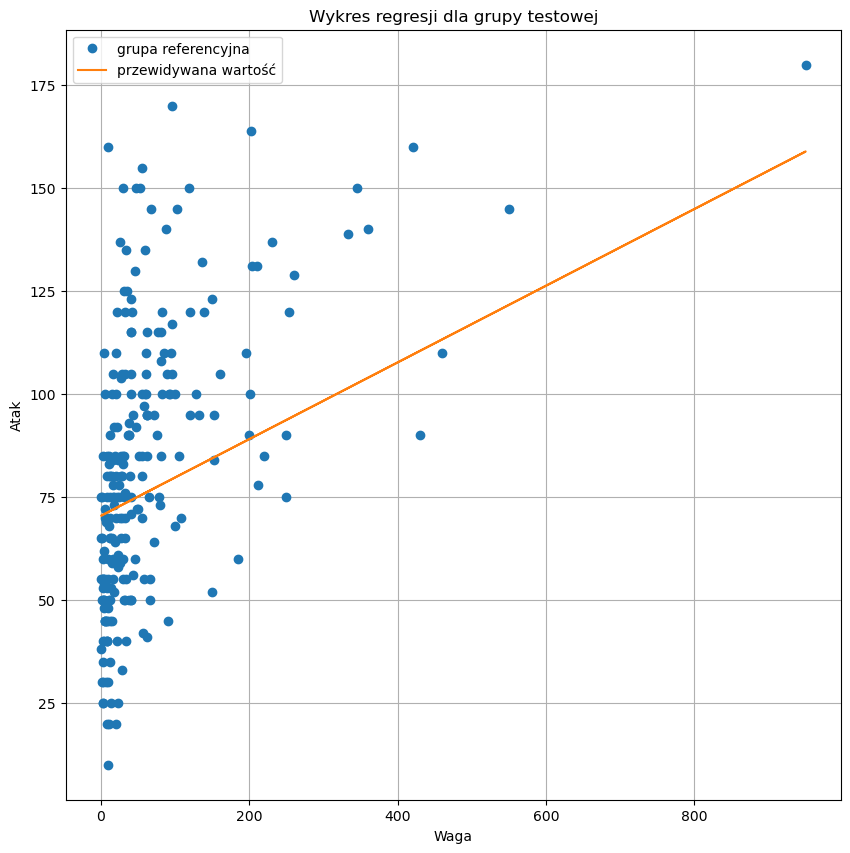

In [77]:
#Wytrenowanie i test modelu
train_x, test_x, train_y, test_y = train_test_split(df['weight_kg'],df1['attack'], test_size=0.3)
train_x = train_x.to_numpy().reshape(-1,1)
train_y = train_y.to_numpy().reshape(-1,1)
model = LinearRegression()
model.fit(train_x, train_y)
b = model.intercept_[0]
a = model.coef_[0][0]
def linear_reg(a,b,x):
    return a*x + b
y_pred = linear_reg(a,b,test_x)
fig = plt.figure(figsize=(10,10))
plt.plot(test_x,test_y,marker='o', linestyle='none')
plt.plot(test_x,y_pred)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Atak")
plt.title("Wykres regresji dla grupy testowej")
plt.show()


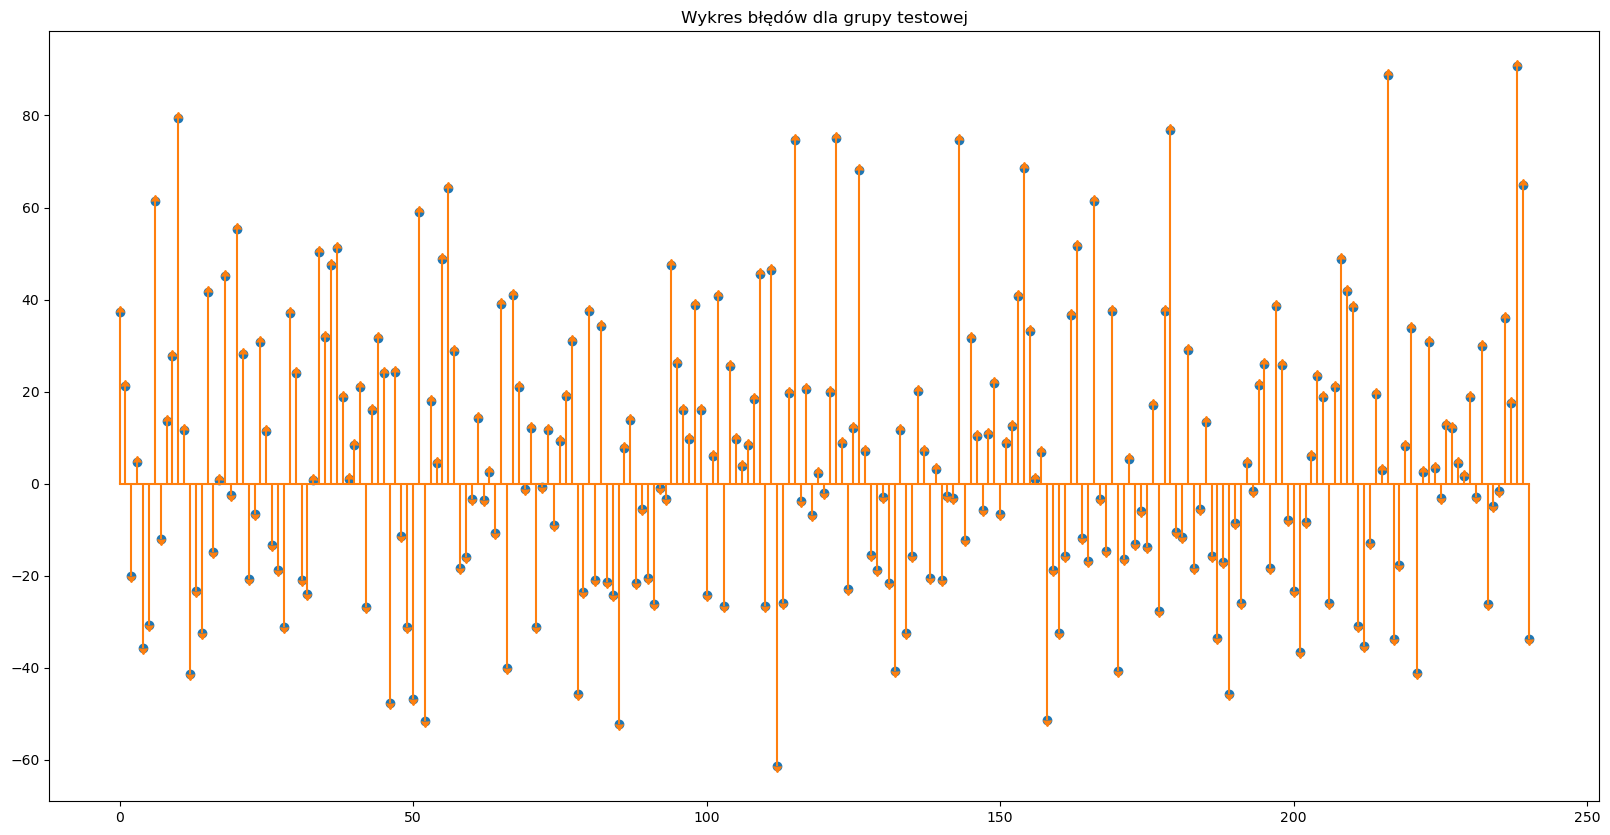

In [79]:
#Wykres błędów dla grupy testowej
fig = plt.figure(figsize=(20,10))
y_error = test_y - y_pred
y_error = y_error.to_numpy().reshape(-1)
y_error
lolims = np.greater(y_error, 0)
uplims = np.less(y_error, 0)
x = np.arange(0, len(y_error))
h = [0]*len(y_error)
plt.plot(y_error, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.title("Wykres błędów dla grupy testowej");

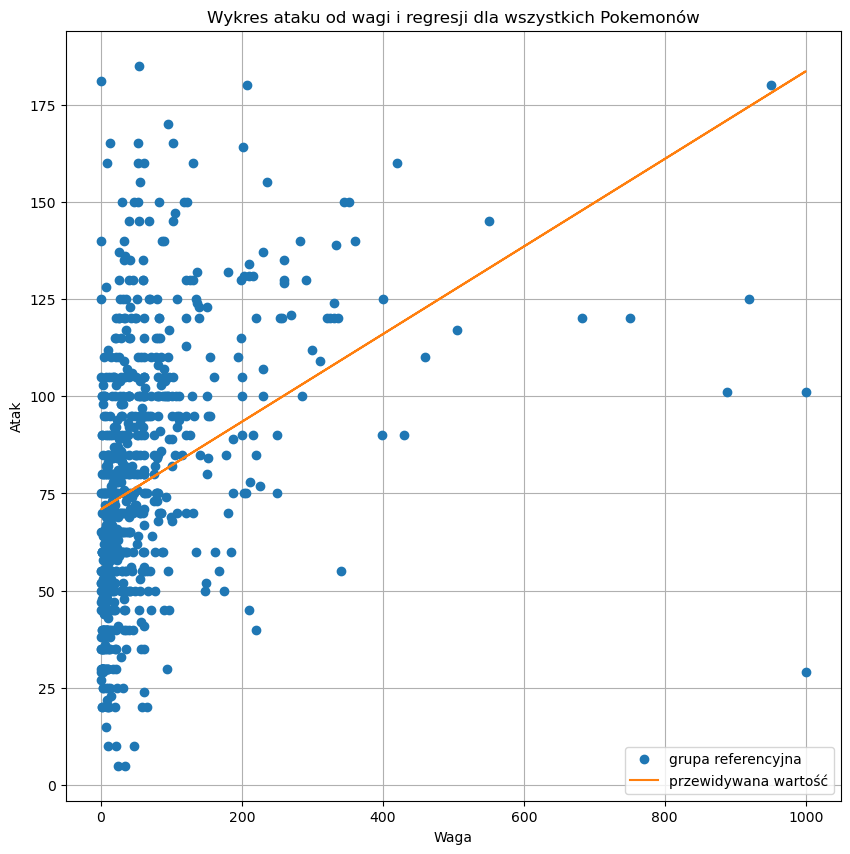

In [80]:
#Wykres regresji liniowej ataku od wagi dla wszystkich pokemonów
y, x = df1['attack'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Atak")
plt.title("Wykres ataku od wagi i regresji dla wszystkich Pokemonów")
plt.show()

##### Uwaga
Ten megaciężki pokemon z małym atakiem to Cosmoem: https://pokemon.fandom.com/wiki/Cosmoem
Ma wysokość tylko 10cm i waży tonę

<ErrorbarContainer object of 3 artists>

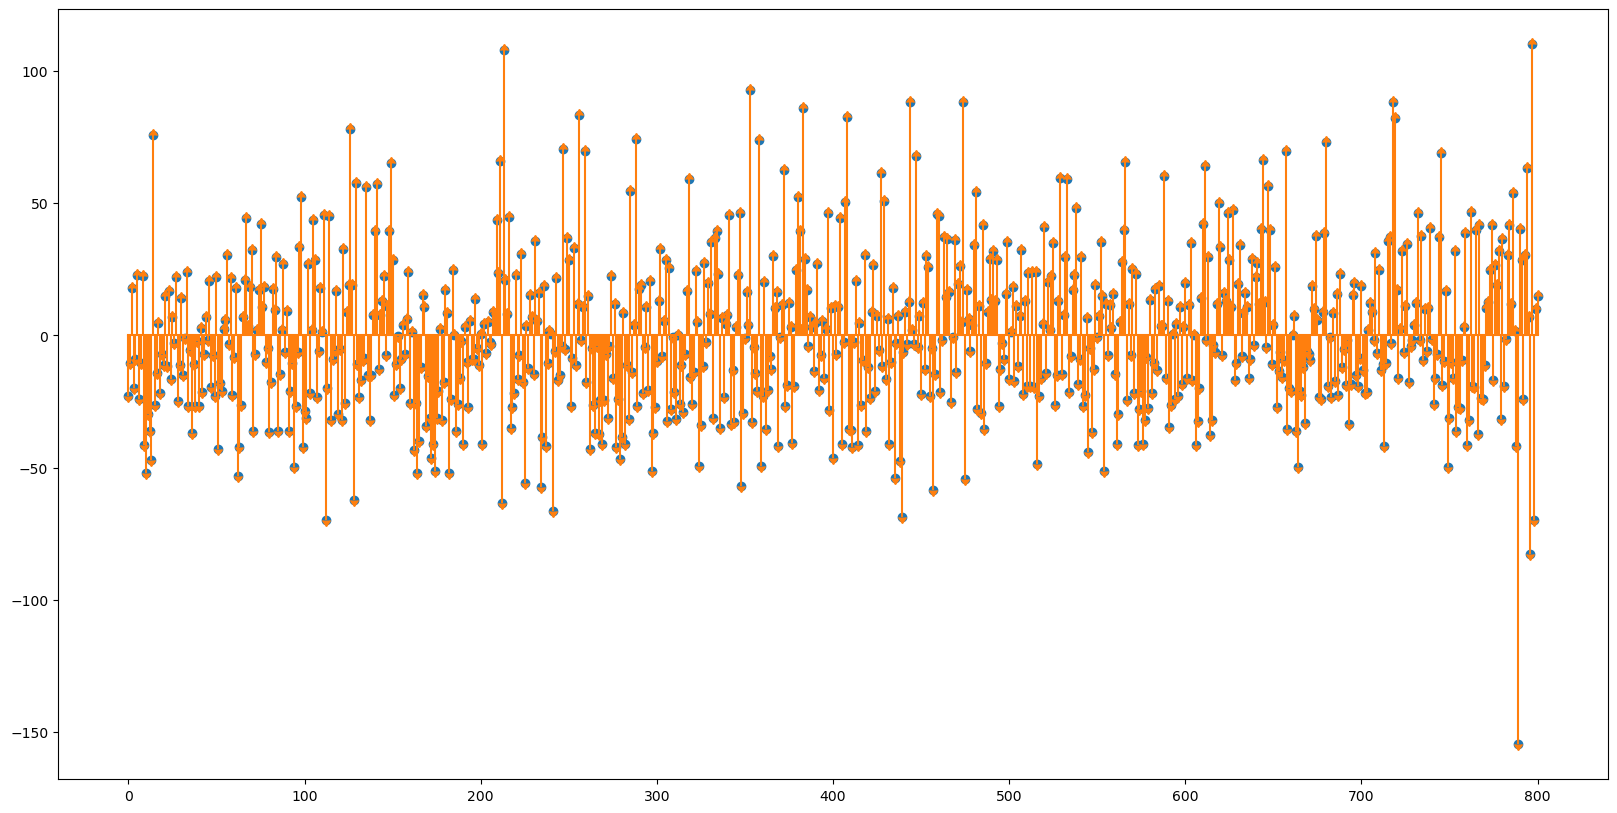

In [81]:
#Wykres błędów dla wszystkich pokemonów
fig = plt.figure(figsize=(20,10))
y_error_all = y - y_pred_all
y_error_all = y_error_all.reshape(-1)
y_error_all
lolims = np.greater(y_error_all, 0)
uplims = np.less(y_error_all, 0)
x = np.arange(0, len(y_error_all))
h = [0]*len(y_error_all)
plt.plot(y_error_all, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_all), label = 'both limits (default)', lolims=lolims, uplims=uplims)

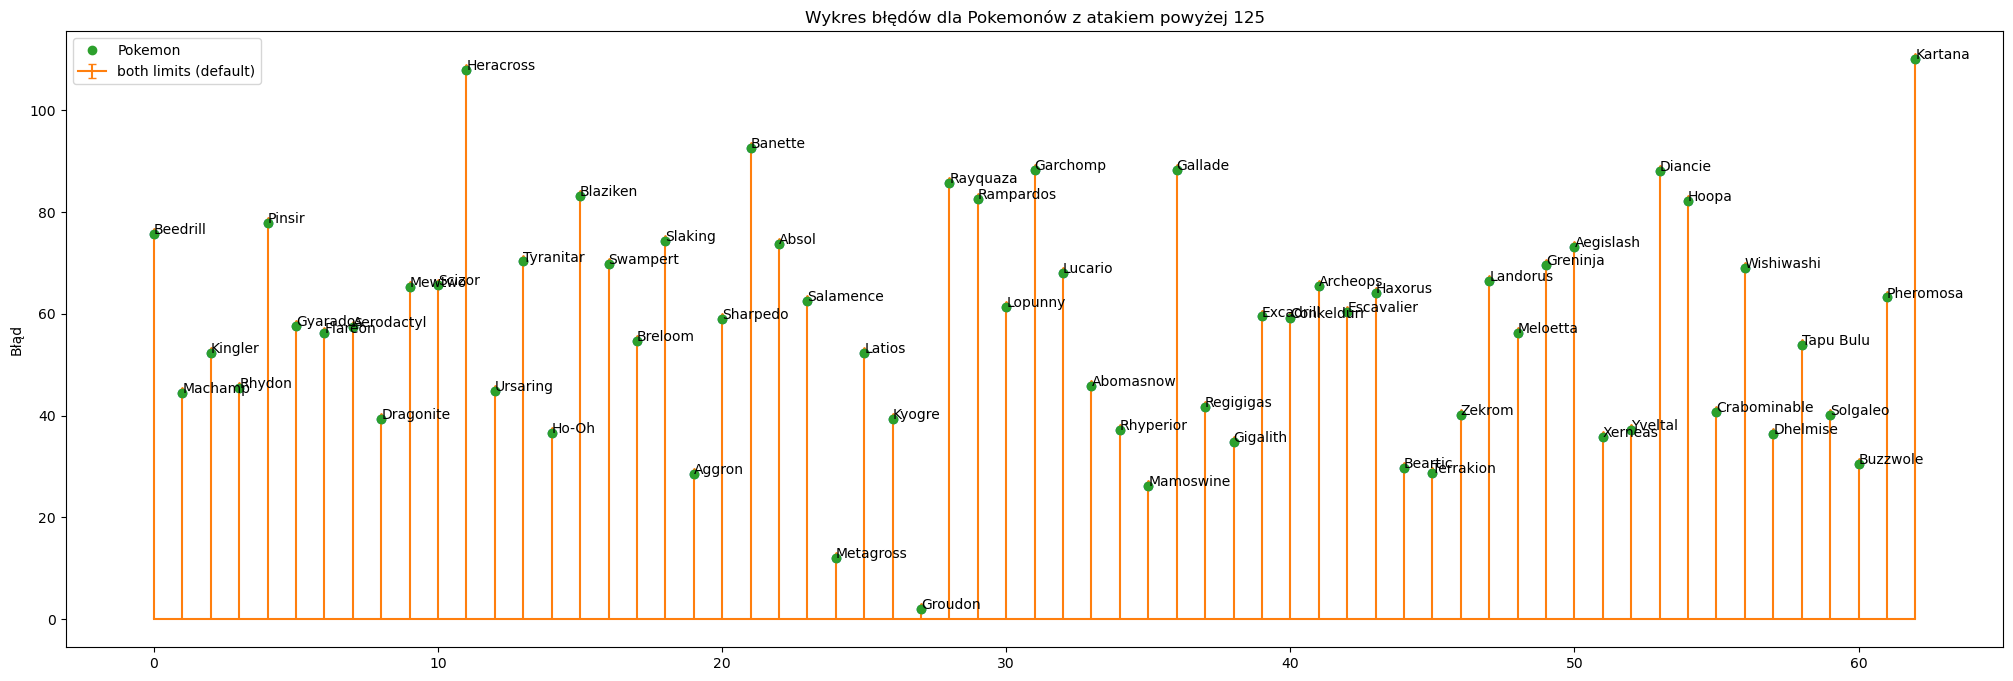

In [82]:
#Wykres błędów dla pokemonów z największym atakiem
y_best = df1['attack'][df['attack'] > 125]
x_best = df['weight_kg'][df['attack'] > 125]
x_best = x_best.to_numpy().reshape(-1,1)
y_best = y_best.to_numpy().reshape(-1,1)
y, x = df1['attack'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_best = linear_reg(a,b,x_best)
y_names_attack = df1['name'][df['attack'] > 125]
y_names_attack.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_best = y_best - y_pred_best
y_error_best = y_error_best.reshape(-1)
y_error_best
lolims = np.greater(y_error_best, 0)
uplims = np.less(y_error_best, 0)
x = np.arange(0, len(y_error_best))
h = [0]*len(y_error_best)
plt.plot(y_error_best, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_best), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_best, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_attack:
    plt.annotate(f'{name}', xy = (i, y_error_best[i]))
    i += 1

plt.ylabel("Błąd")
plt.title("Wykres błędów dla Pokemonów z atakiem powyżej 125")
plt.legend()
plt.show() 

#### Wniosek

Wpływ ciężaru pokemona na jego atak jest pozytywny choć nie ma zbyt dużego wpływu. Ciężko znaleźć dużą korelację.

Patrząć na powstałe wykresy można wyróżnić kilka pokemonów jak Heracross czy Kartana okazują się jednak słabe w innych cechach. Warto zwrócić uwagę na Blzikena, Banette, Rayquaza, Garchomp, Gallade, Diancie oraz na Groudona.

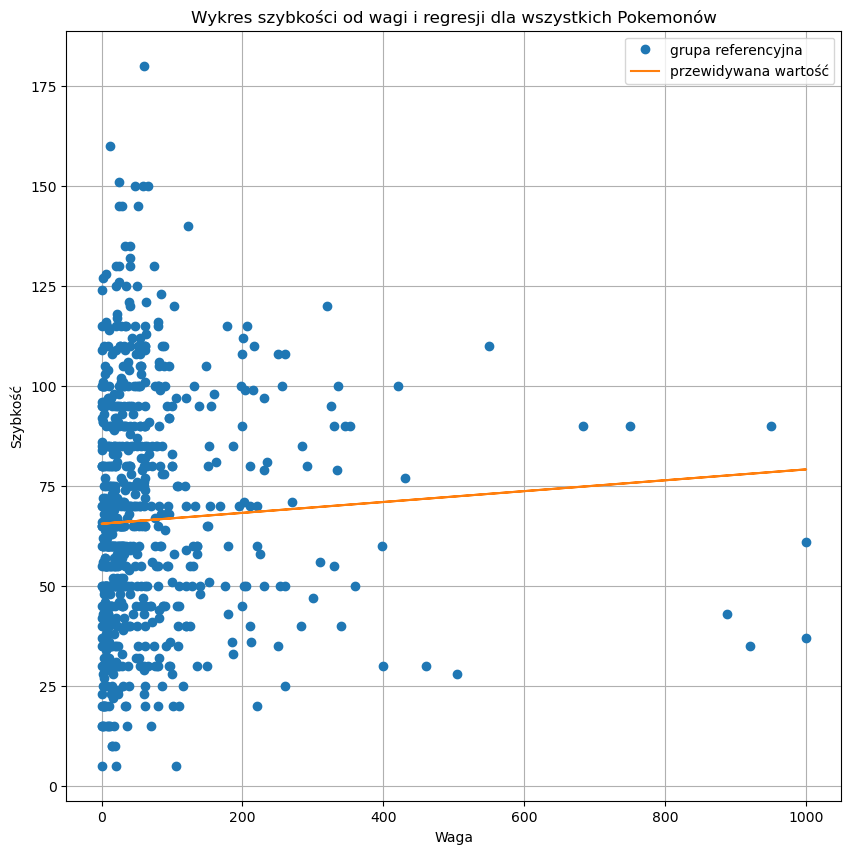

In [83]:
#Wykres szybkości od wagi i regresji dla wszystkich Pokemonów
y, x = df2_speed['speed'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Szybkość")
plt.title("Wykres szybkości od wagi i regresji dla wszystkich Pokemonów")
plt.show()

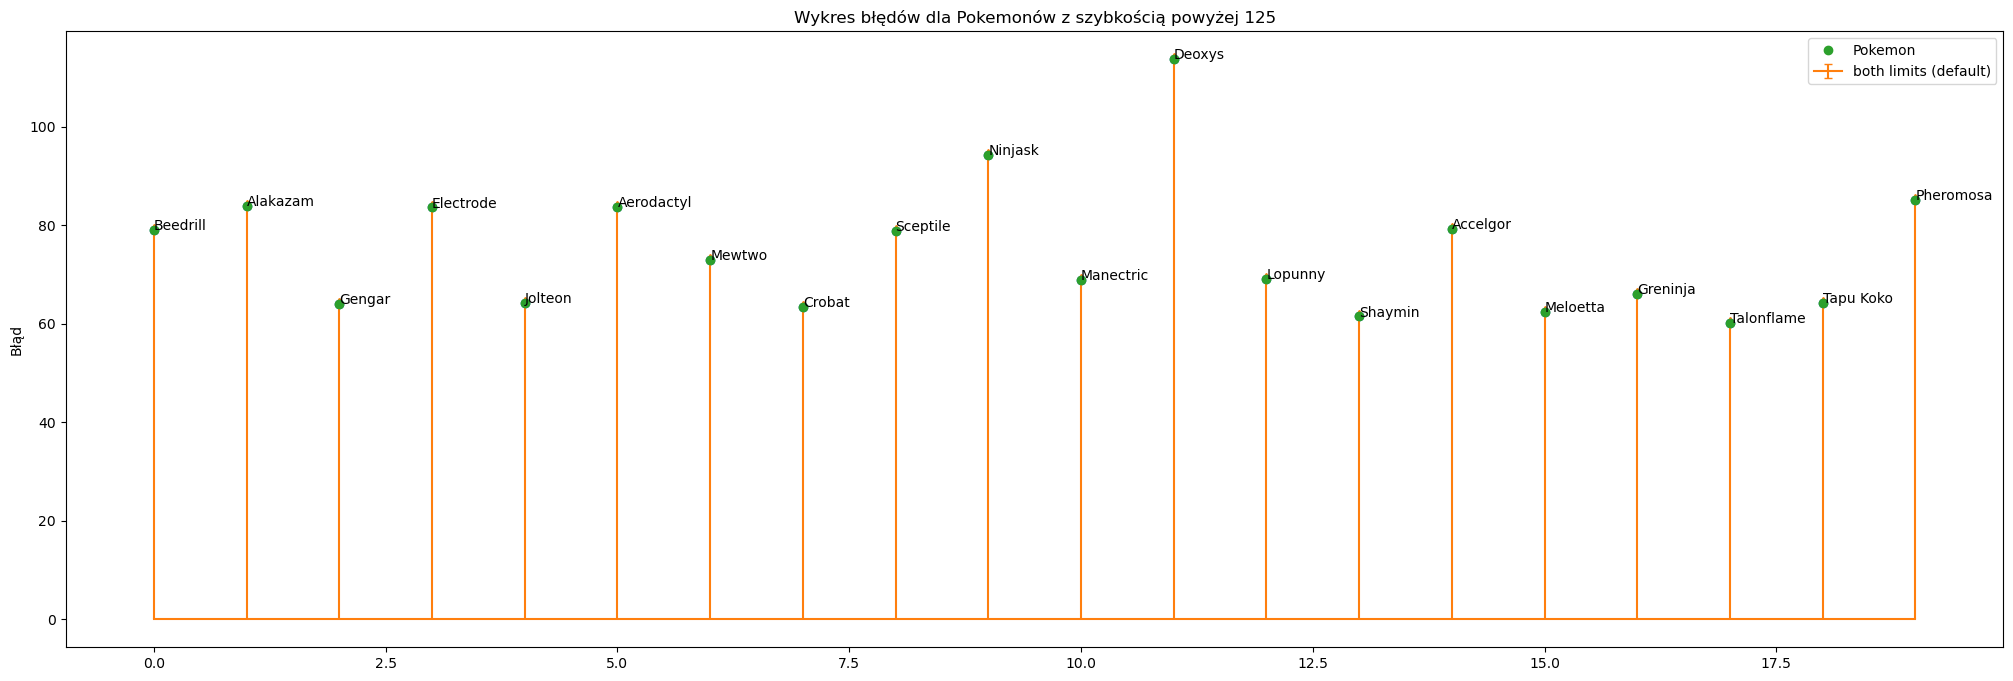

In [84]:
#Wykres błędów dla pokemonów z największą szybkością
y_speed = df2_speed['speed'][df['speed'] > 125]
x_speed = df['weight_kg'][df['speed'] > 125]
x_speed = x_speed.to_numpy().reshape(-1,1)
y_speed = y_speed.to_numpy().reshape(-1,1)
y, x = df2_speed['speed'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_speed = linear_reg(a,b,x_speed)
y_names_speed = df2_speed['name'][df['speed'] > 125]
y_names_speed.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_speed = y_speed - y_pred_speed
y_error_speed = y_error_speed.reshape(-1)
y_error_speed
lolims = np.greater(y_error_speed, 0)
uplims = np.less(y_error_speed, 0)
x = np.arange(0, len(y_error_speed))
h = [0]*len(y_error_speed)
plt.plot(y_error_speed, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_speed), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_speed, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_speed:
    plt.annotate(f'{name}', xy = (i, y_error_speed[i]))
    i += 1

plt.ylabel("Błąd")
plt.title("Wykres błędów dla Pokemonów z szybkością powyżej 125")
plt.legend()
plt.show() 


#### Wniosek
Tylko Mewtwo pojawił się na jednym i drugim wykresie

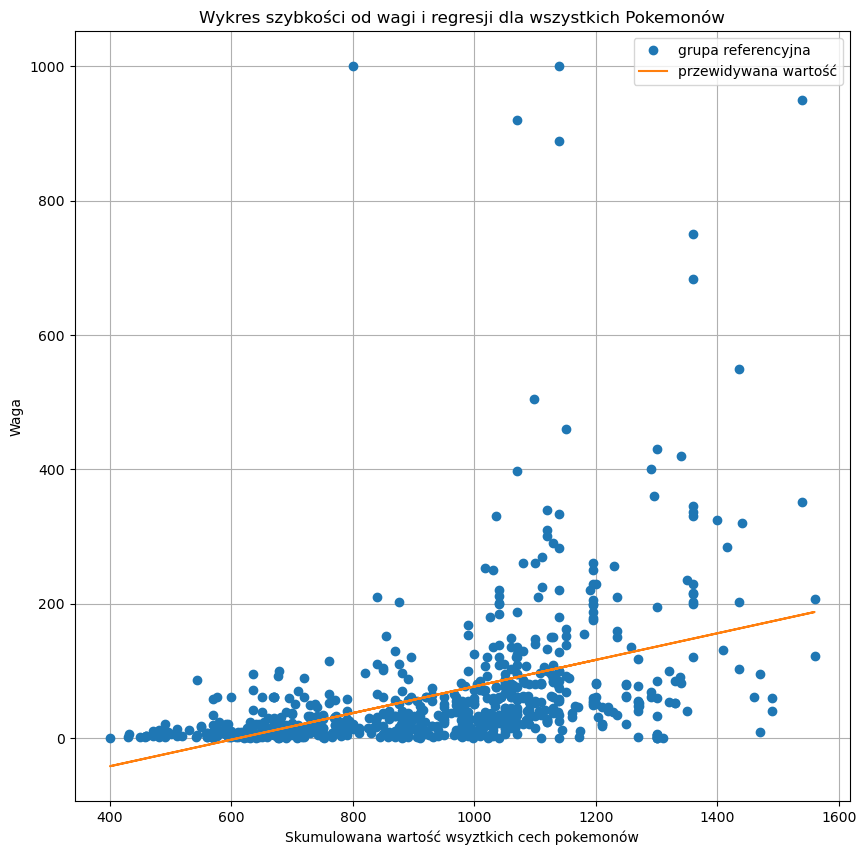

In [85]:
#Wykres regresji liniowej wielu cech od wagi dla wszystkich pokemonów
x = df3_multi['all']
y = df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
#print('R2= ', r2_score(y,y_pred_all))
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Skumulowana wartość wsyztkich cech pokemonów')
plt.ylabel("Waga")
plt.title("Wykres zależności wagi od cech wszystkich Pokemonów")
plt.show()

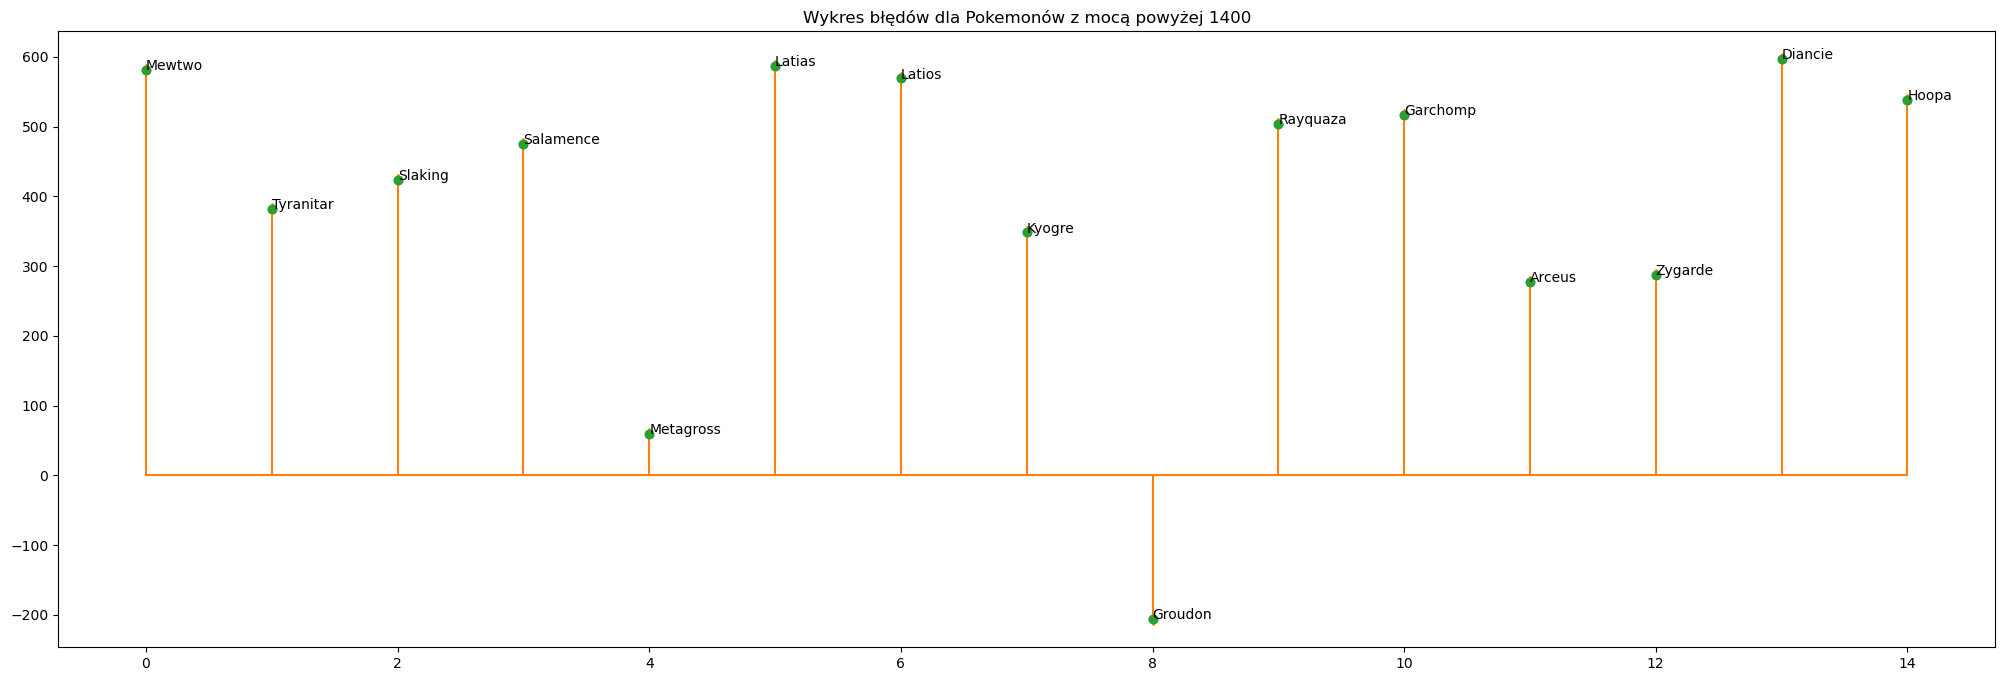

In [86]:
#Udowodnienie, że wszystkie najpotężniejsze pokemony są rzeczywiście najcięższe
y_all = df3_multi['all'][df3_multi['all'] > 1400]
x_all = df['weight_kg'][df3_multi['all'] > 1400]
x_all = x_all.to_numpy().reshape(-1,1)
y_all = y_all.to_numpy().reshape(-1,1)
y, x = df3_multi['all'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x_all)
y_names_all = df3_multi['name'][df3_multi['all'] > 1400]
y_names_all.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_all = y_all - y_pred_all
y_error_all = y_error_all.reshape(-1)
y_error_all
lolims = np.greater(y_error_all, 0)
uplims = np.less(y_error_all, 0)
x = np.arange(0, len(y_error_all))
h = [0]*len(y_error_all)
plt.plot(y_error_all, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_all), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_all, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_all:
    plt.annotate(f'{name}', xy = (i, y_error_all[i]))
    i += 1

plt.title("Wykres błędów dla Pokemonów z mocą powyżej 1400")
plt.show() 

<div style="text-align: center;"><b><h1>Współczynnik determinacji $$R^2$$</h1></b></div>

$$ 
R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

In [70]:
R2 = r2_score(test_y, y_pred)
R2

0.016814621794162266

### Wnioski
Poszukiwanie najlepszego pokemona pod względem ich wagi nie było najlepszym pomysłem. 
Wyniki dla wszystkich cech włącznie z takimi, które wydawałyby się oczywiste jak punkty życia czy siła ataku nie mają dużej korelacji z wagą pokemona.
Takie pokemony jak Cosmoun pokazują jak bardzo wyjątkowe potrafią być.
Wszystkie wyniki wskazują zawsze te same pokemony, najlepsze cechy niezależnie od ich wagi posiadają legendarne pokemony takie jak Mewtwo, Rayquaza, Groudon, Kyogre, Garchomp, Diancie, Zygarde.
Jak się później okaże nasze zespoły będą składały się głównie z tych pokemonów.

<div style="text-align: center;"><b><h1>Gra</h1></b></div>

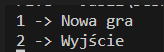

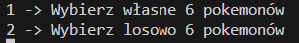

<div style="text-align: center;"><b><h1>Zasady gry</h1></b></div>

<div style="text-align: center;"><h3>Każdy gracz posiada 6 pokemonów</h3></div>
<div style="text-align: center;"><h3>Każdy pokemon ma 20% szans na pudło</h3></div>
<div style="text-align: center;"><h3>$$ZO = A * WA - OAP$$</h3></div>
<br>
<div style="text-align: center;"><b><h3>$$gdzie:$$</h3></b></div>
<div style="text-align: center;"><b><h3>$$ZO - Zadane obrażenia$$</h3></b></div>
<div style="text-align: center;"><b><h3>$$WA  - Współczynnik ataku dla danego typu$$</h3></b></div>
<div style="text-align: center;"><b><h3>$$A - Atak$$</h3></b></div>
<div style="text-align: center;"><b><h3>$$OAP - Obrona atakowanego pokemona$$</h3></b></div>
<div style="text-align: center;"><h3>W przypadku, gdy ZO < 5 to atak wynosi 5HP</h3></div>

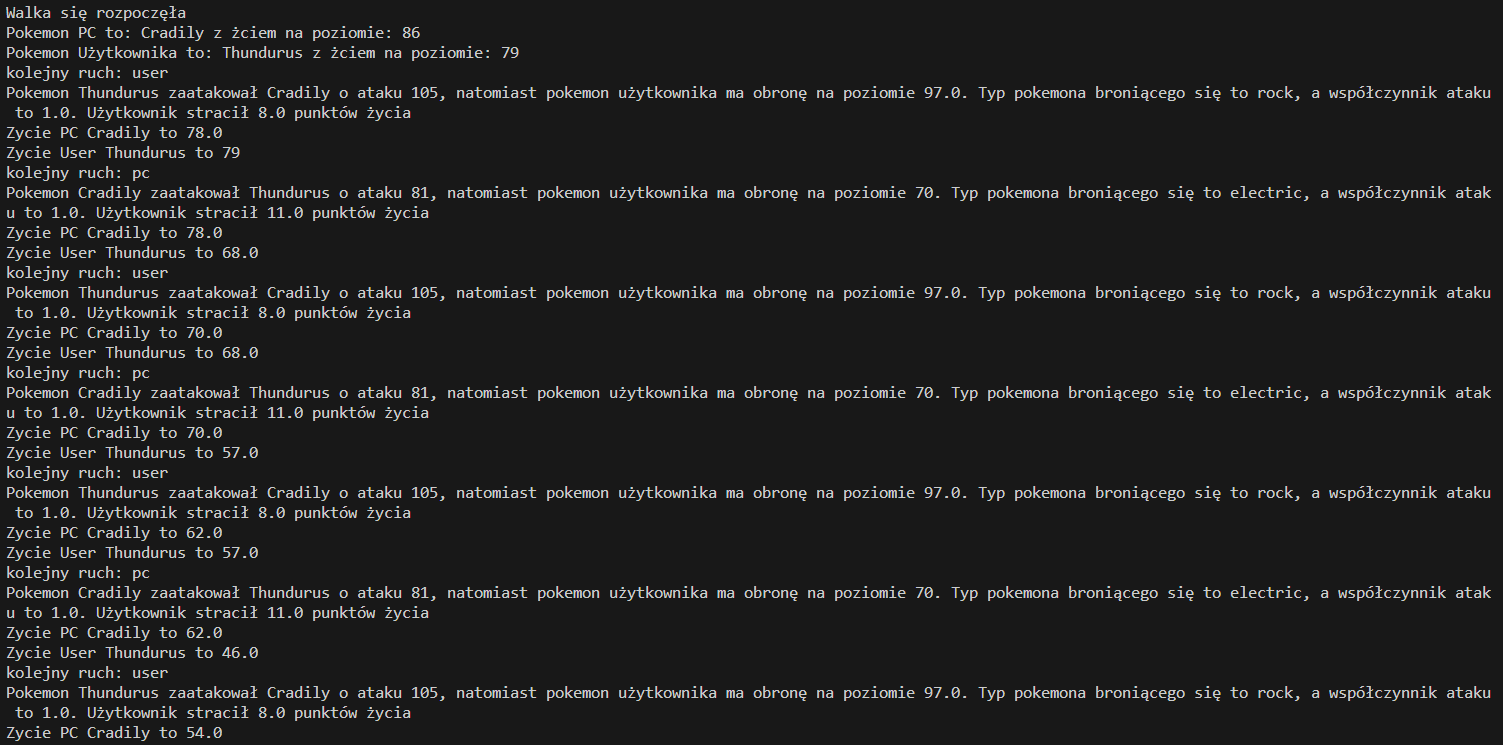

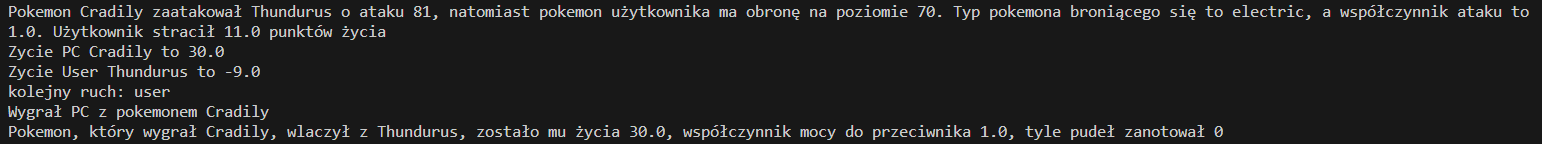

<div style="text-align: center;"><b><h1>Uzyskane wyniki</h1></b></div>

In [87]:
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25             1.0          2.0   
1             2.0            1.0           0.25             1.0          2.0   
2             2.0            1.0           0.25             1.0          2.0   
3             1.0            1.0           0.50             2.0          0.5   
4             1.0            1.0           0.50             2.0          0.5   

   against_normal  against_poison  against_psychic  against_rock  \
0             1.0             1.0              2.0           1.0   
1             1.0             1.0              2.0           1.0   
2             1.0             1.0              2.0           1.0   
3             1.0             1.0              1.0           2.0   
4             1.0             1.0              1.0           2.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
0            1.0            0.5      49            5120              70   
1            1.0            0.5      62            5120              70   
2            1.0            0.5     100            5120              70   
3            0.5            2.0      52            5120              70   
4            0.5            2.0      64            5120              70   

   base_total capture_rate   classfication  defense  experience_growth  hp  \
0         318           45    Seed Pokémon       49            1059860  45   
1         405           45    Seed Pokémon       63            1059860  60   
2         625           45    Seed Pokémon      123            1059860  80   
3         309           45  Lizard Pokémon       43            1059860  39   
4         405           45   Flame Pokémon       58            1059860  58   

      japanese_name        name  pokedex_number  sp_attack  sp_defense  speed  \
0  Fushigidaneフシギダネ   Bulbasaur               1         65          65     45   
1   Fushigisouフシギソウ     Ivysaur               2         80          80     60   
2  Fushigibanaフシギバナ    Venusaur               3        122         120     80   
3      Hitokageヒトカゲ  Charmander               4         60          50     65   
4       Lizardoリザード  Charmeleon               5         80          65     80   

   type1  weight_kg  generation  is_legendary  
0  grass        6.9           1             0  
1  grass       13.0           1             0  
2  grass      100.0           1             0  
3   fire        8.5           1             0  
4   fire       19.0           1             0

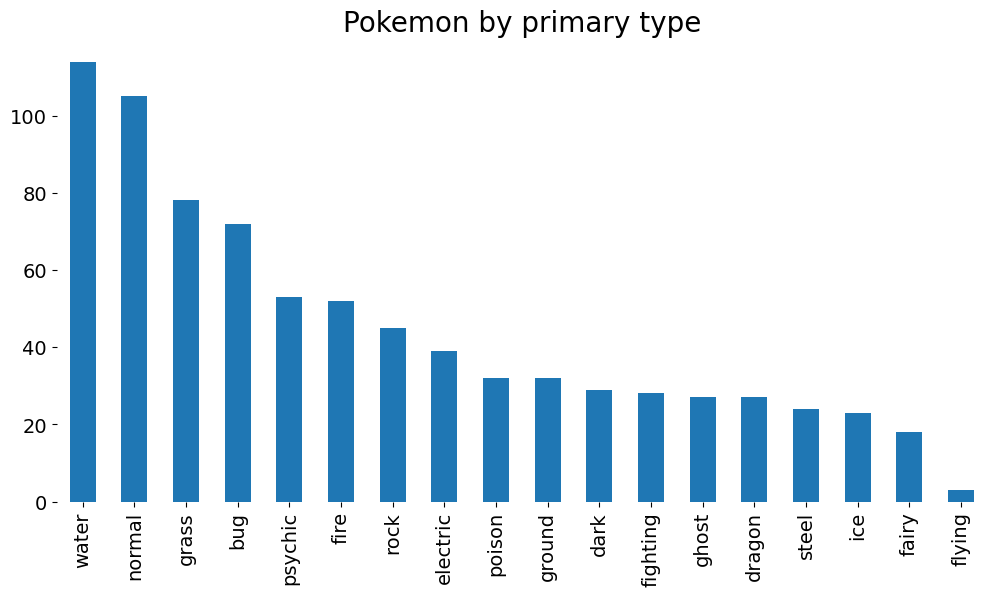

In [111]:
df = pd.read_csv('data/pokemon.csv')
type_plot = df.type1.value_counts().plot.bar(figsize=(12,6),fontsize=14)
type_plot.set_title('Pokemon by primary type',fontsize=20)
sns.despine(bottom=True,left=True)

Text(0.5, 1.0, 'Procent zwycięstw w symulacji w zależności od typu pokemonów')

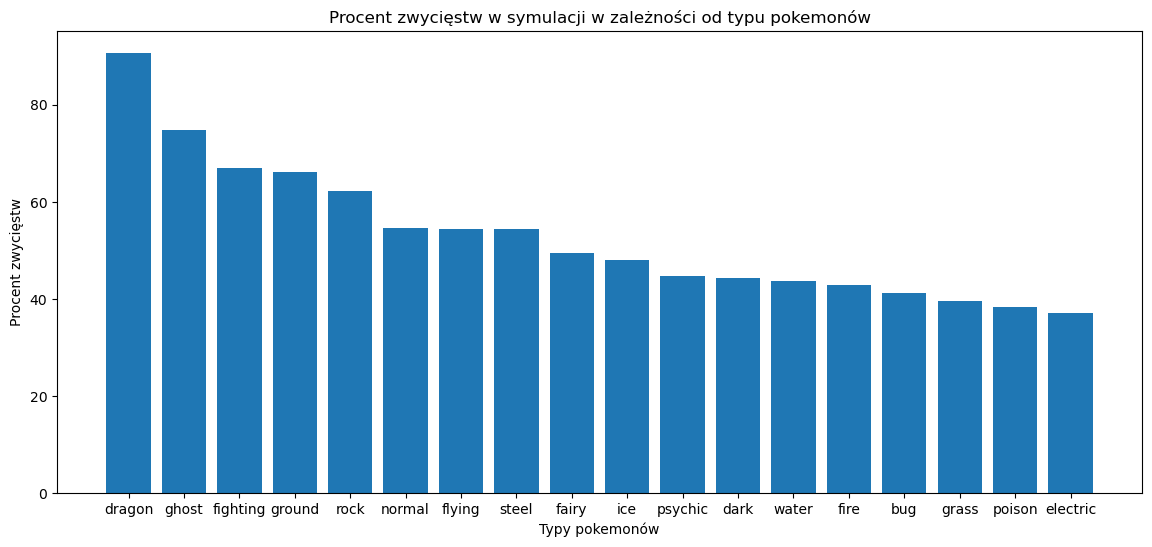

In [106]:
df = pd.read_csv('gra/dane.csv')
df2 = df[['Lost', ' Lost Type']].groupby(by = ' Lost Type').count().sort_values(by=' Lost Type', ascending = False).reset_index(' Lost Type')
winners = df[['Winner', ' Type Winer']].groupby(' Type Winer').count().sort_values(by=' Type Winer', ascending = False).reset_index(' Type Winer')
df2['Winners'] = winners['Winner']
df2.rename(columns = {'Lost': 'Losers', ' Lost Type': 'Type'},  inplace = True)
df2['Number_of_battles'] = df2['Winners'] +df2['Losers']
df2['Winning_ratio'] = np.round(df2['Winners']/df2['Number_of_battles']*100, 2)
cols = ['Type', 'Number_of_battles', 'Winners', 'Losers', 'Winning_ratio']
df2 = df2[cols]
df2.sort_values(['Winning_ratio'], ascending= False, inplace=True)


fig = plt.figure(figsize=(14,6))
plt.bar(x=df2['Type'], height = df2['Winning_ratio'])
plt.xlabel('Typy pokemonów')
plt.ylabel("Procent zwycięstw")
plt.title("Procent zwycięstw w symulacji w zależności od typu pokemonów")


In [88]:
#df = pd.read_csv(r'C:\Users\neumannp\OneDrive - Jabil\Desktop\Bootcamp\Grupa Prograte\jdszr13-prograde\python-project\gra i dane z gry\dane.csv')
df = pd.read_csv('gra/dane.csv')

<div style="text-align: center;"><b><h1>Wykres najczęściej wygrywających</h1></b></div>

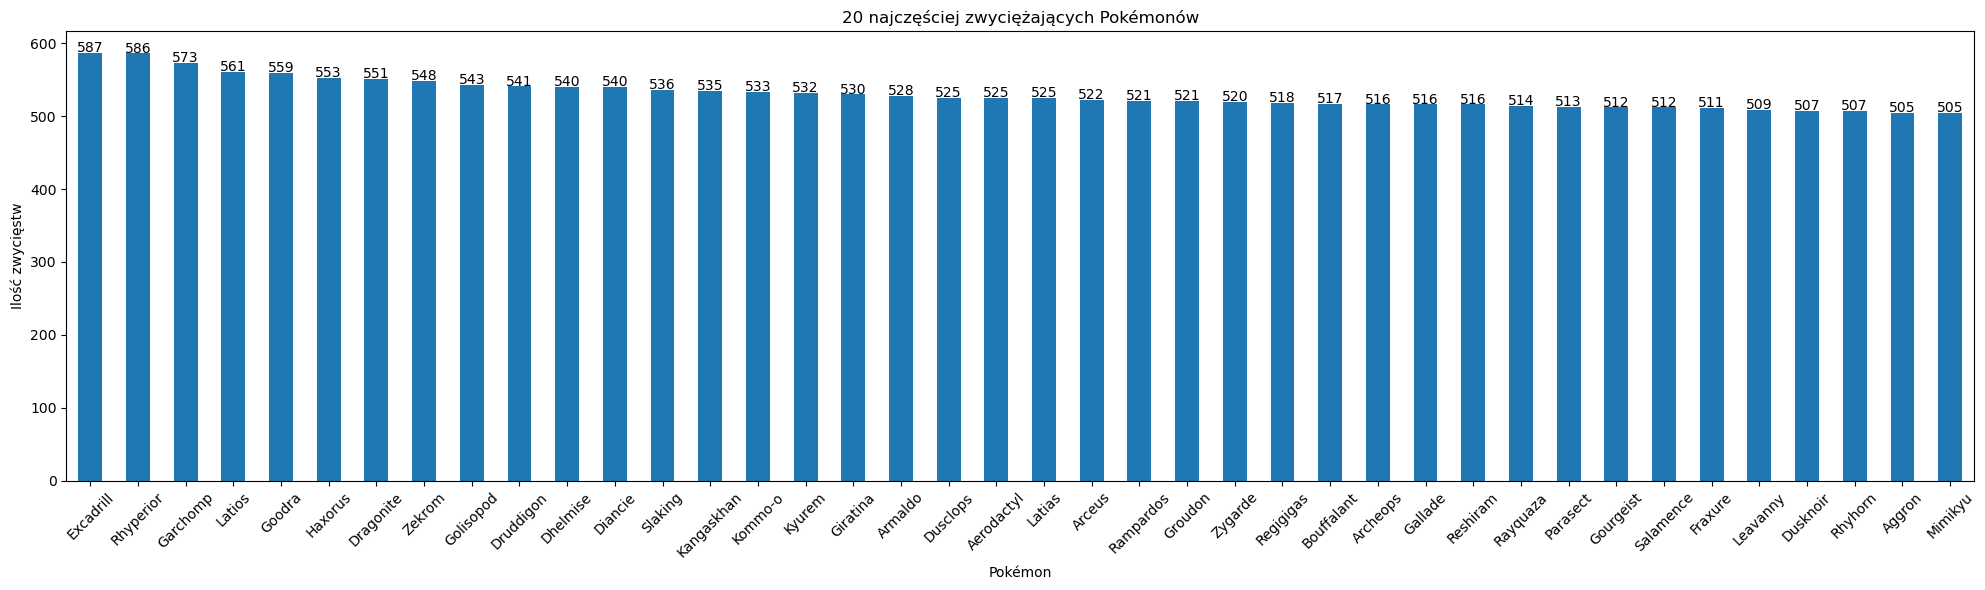

Excadrill     587
Rhyperior     586
Garchomp      573
Latios        561
Goodra        559
Haxorus       553
Dragonite     551
Zekrom        548
Golisopod     543
Druddigon     541
Dhelmise      540
Diancie       540
Slaking       536
Kangaskhan    535
Kommo-o       533
Kyurem        532
Giratina      530
Armaldo       528
Dusclops      525
Aerodactyl    525
Latias        525
Arceus        522
Rampardos     521
Groudon       521
Zygarde       520
Regigigas     518
Bouffalant    517
Archeops      516
Gallade       516
Reshiram      516
Rayquaza      514
Parasect      513
Gourgeist     512
Salamence     512
Fraxure       511
Leavanny      509
Dusknoir      507
Rhyhorn       507
Aggron        505
Mimikyu       505
Name: Winner, dtype: int64

In [103]:
pokemon_counts = df['Winner'].value_counts()

# Wybierz 20 pokemonów z największą ilością zwycięstw
top_pokemon_counts = pokemon_counts.head(40)
most_winning_pokemon = top_pokemon_counts.idxmax()
max_wins = top_pokemon_counts.max()

# Tworzenie wykresu
plt.figure(figsize=(20, 6))

# Użyj indeksów pokemona jako nazw na osi X
ax = top_pokemon_counts.plot(kind='bar')
plt.title('20 najczęściej zwyciężających Pokémonów')
plt.xlabel('Pokémon')
plt.ylabel('Ilość zwycięstw')
plt.xticks(range(len(top_pokemon_counts.index)), top_pokemon_counts.index, rotation=45)
plt.tight_layout()

# Dodaj etykiety z ilościami zwycięstw na każdym słupku
for i, v in enumerate(top_pokemon_counts):
    ax.text(i, v + 1, str(v), color='black', ha='center')

plt.show()

<div style="text-align: center;"><b><h1>Wykres najczęściej przegrywających</h1></b></div>

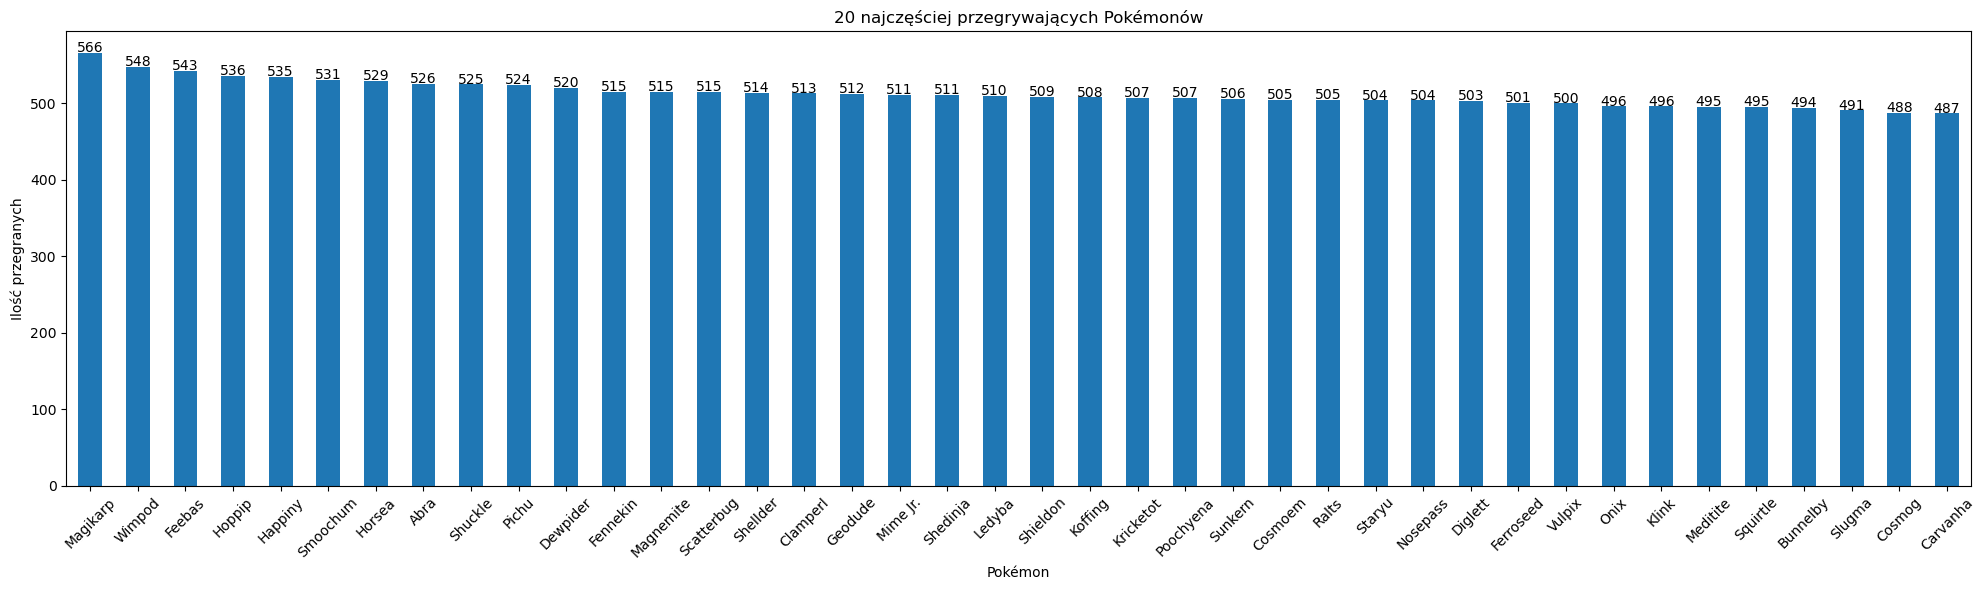

In [91]:
pokemon_losses = df['Lost'].value_counts()

# Wybierz 20 pokemonów z największą ilością przegranych
top_pokemon_losses = pokemon_losses.head(40)
most_losing_pokemon = top_pokemon_losses.idxmax()
max_losses = top_pokemon_losses.max()

# Tworzenie wykresu
plt.figure(figsize=(20, 6))

# Użyj indeksów pokemona jako nazw na osi X
ax = top_pokemon_losses.plot(kind='bar')
plt.title('20 najczęściej przegrywających Pokémonów')
plt.xlabel('Pokémon')
plt.ylabel('Ilość przegranych')
plt.xticks(range(len(top_pokemon_losses.index)), top_pokemon_losses.index, rotation=45)
plt.tight_layout()

# Dodaj etykiety z ilościami przegranych na każdym słupku
for i, v in enumerate(top_pokemon_losses):
    ax.text(i, v + 1, str(v), color='black', ha='center')

plt.show()

# Wnioski w postaci wybranych drużyn i wyniki z challenges - Mikołaj